# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
real_estate = pd.read_csv('/Users/эйч пи/Desktop/Учеба/Аналитик данных/jupyter notebook/DataSet/real_estate_data.csv', sep = '\t') 
real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


In [3]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Предварительная оценка:
- Всего записей 23 699
- Наименования columns соответствуют стилю
- first_day_exposition - тип object -  перевести в тип datetime
- ceiling_height - нулевые значения, высота потолков указана не у всех, заменить на медиану
- floors_total - тип float64 - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения (немного) 
- is_apartment -тип object, должен быть тип bool + нулевые значения
- living_area - нулевые значения,
- kitchen_area - нулевые значения 
- balcony - нулевые значения, вероятно нет балконов
- locality_name - нулевые значения, удалить, незначительное колличество.
- airports_nearest - нулевые значения, вероятно заменить на среднее значение
- cityCenters_nearest - нулевые значения, переведем в КМ, пропуски заменим на медиану
- parks_around3000 - нулевые значения, оставим пропуски
- parks_nearest - нулевые значения, переведем в КМ, оставим пропуски
- ponds_around3000 - нулевые значения, оставим пропуски
- ponds_nearest - нулевые значения, оставим 
- days_exposition - нулевые значения, заменим на 0

array([[<AxesSubplot: title={'center': 'total_images'}>,
        <AxesSubplot: title={'center': 'last_price'}>,
        <AxesSubplot: title={'center': 'total_area'}>,
        <AxesSubplot: title={'center': 'rooms'}>],
       [<AxesSubplot: title={'center': 'ceiling_height'}>,
        <AxesSubplot: title={'center': 'floors_total'}>,
        <AxesSubplot: title={'center': 'living_area'}>,
        <AxesSubplot: title={'center': 'floor'}>],
       [<AxesSubplot: title={'center': 'kitchen_area'}>,
        <AxesSubplot: title={'center': 'balcony'}>,
        <AxesSubplot: title={'center': 'airports_nearest'}>,
        <AxesSubplot: title={'center': 'cityCenters_nearest'}>],
       [<AxesSubplot: title={'center': 'parks_around3000'}>,
        <AxesSubplot: title={'center': 'parks_nearest'}>,
        <AxesSubplot: title={'center': 'ponds_around3000'}>,
        <AxesSubplot: title={'center': 'ponds_nearest'}>],
       [<AxesSubplot: title={'center': 'days_exposition'}>,
        <AxesSubplot: >, 

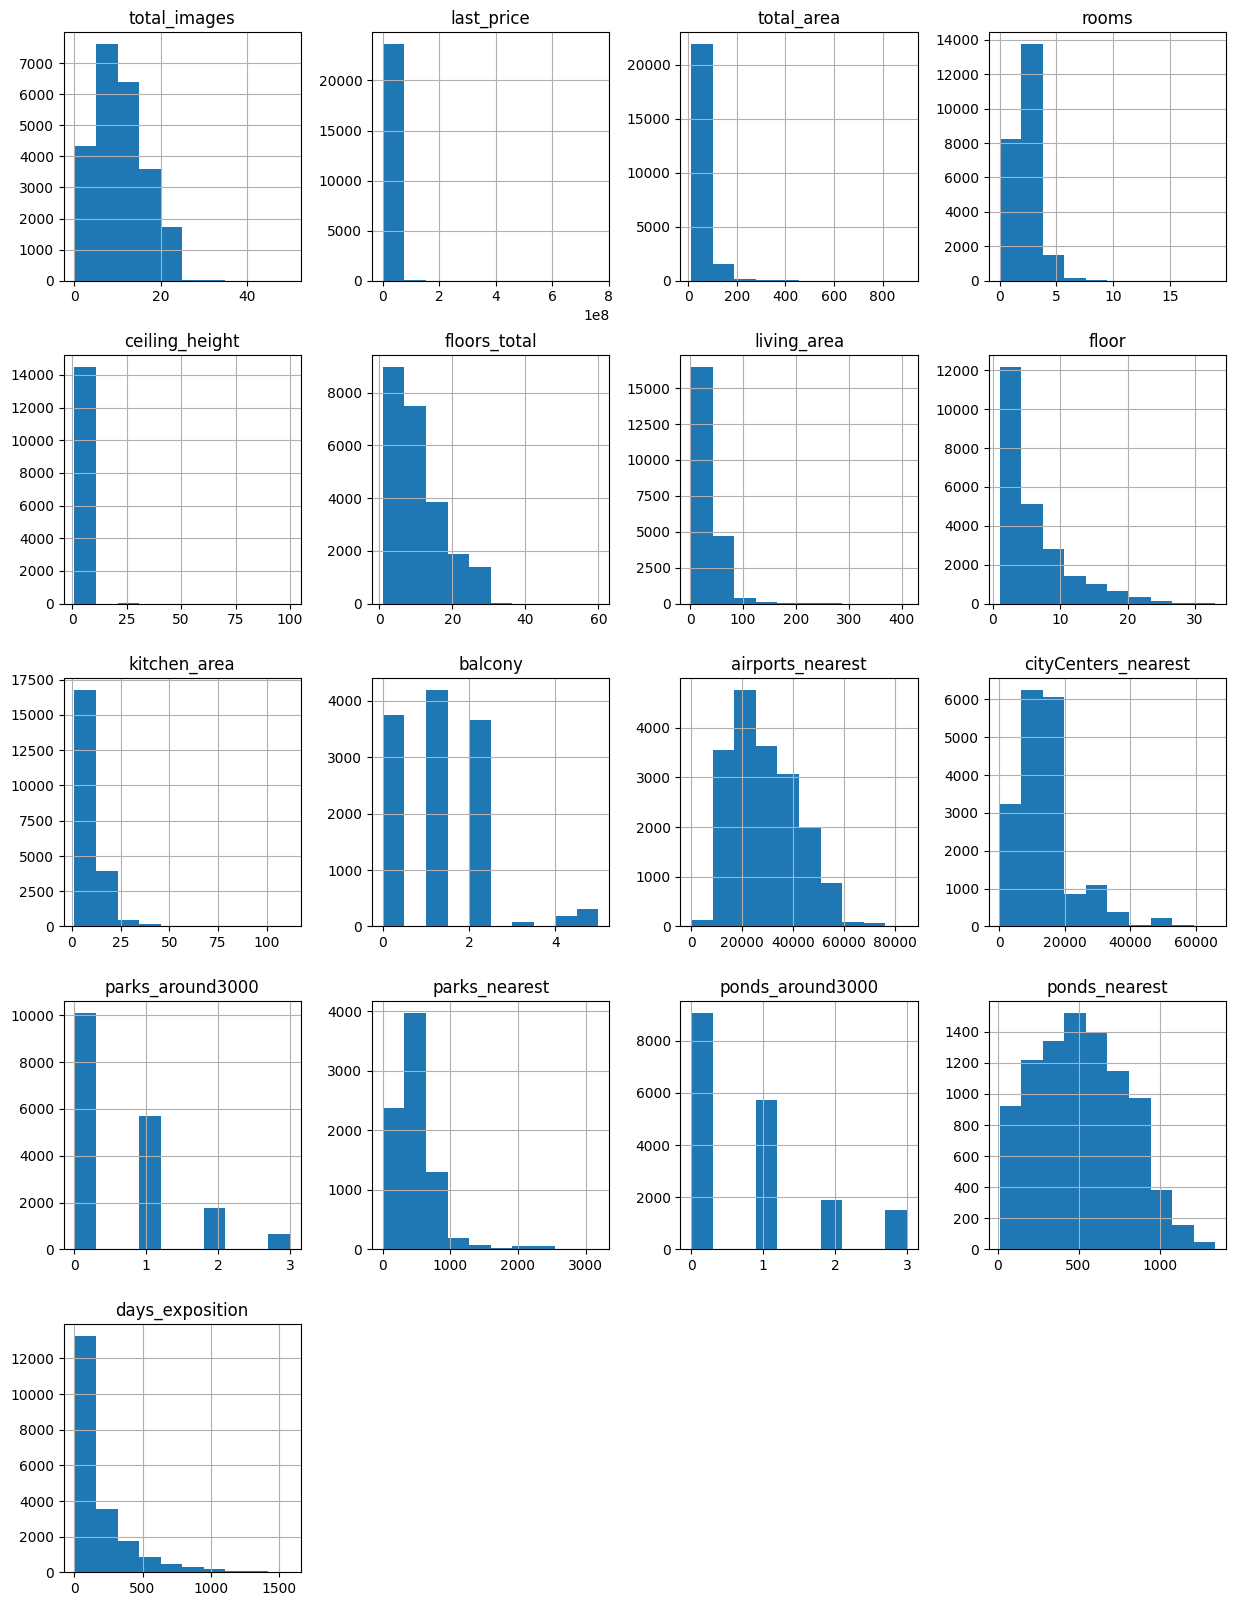

In [4]:
real_estate.hist(figsize=(15, 20))

In [5]:
real_estate.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Основные выбросы
- total_area - от 12 до 900 метров
- rooms - 19 комнат - подозрительно, замок? 0 комнат - уточнить количество
- ceiling_height - от 1 до  100 метров, квартили выглядят адекватно
- floors_total - 60 этажей в Питере нет таких жилых зданий
- living_area и kitchen_area вероятно от total_area - есть выбросы походие на замок
- balcony - есть аномалии по количеству
- airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - в метрах, надо перевести в КМ
- days_exposition - 1580 дней продажи?

В целом данные выглядят реалистично, за исключением некоторых выбросов и нулей.


### Предобработка данных

#### Проверка дублей

In [6]:
display(real_estate.duplicated().sum()) # проверим на наличие дубликатов

0

#### Переведем дату в другой формат

In [7]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format = '%Y-%m-%d') 
#переведем тип в datatime

#### Отработаем высоту потолков

<AxesSubplot: ylabel='Frequency'>

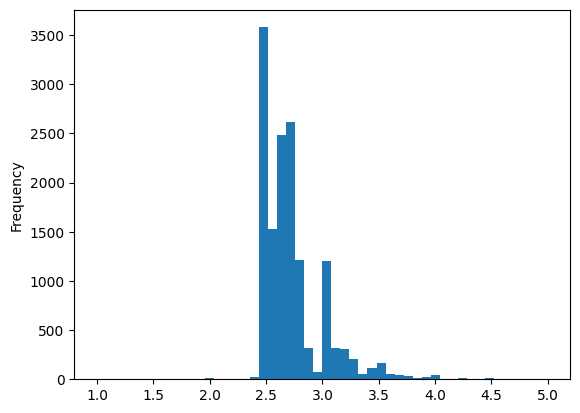

In [8]:
real_estate['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 50, range=(1,5))

Высота потолков в основном сосредоточена в диапазоне от 2,5 до 3,7. Есть отдельные выбросы в 2 м и более 4. 

In [9]:
real_estate['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [10]:
real_estate.ceiling_height.unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

- Отличие медианы от среднего не значительное, но среднее больше из-за выброса в 100 метров. Заменим пропуски на медиану, удалим выбросы более 4 метров
- исправим явные ошибки при заполнении 25, 32...

In [11]:
for i in real_estate['ceiling_height']:
    if i >=24:
        real_estate['ceiling_height']=real_estate['ceiling_height'].replace(i, i/10)
# уберем ошибки с запятой в значениях 25, 26, 27, 32...        

In [12]:
display(real_estate[real_estate['ceiling_height'] > 4]['ceiling_height'].count()) # сколько выше 4 метров
display(real_estate[real_estate['ceiling_height'] < 2.4]['ceiling_height'].count()) # сколько ниже 2,5

55

21

In [13]:
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(real_estate['ceiling_height'].median())
# пропуски заменили, надо убрать min и max 
real_estate.drop(real_estate[real_estate['ceiling_height'] >4].index, inplace = True) # удалим выбросы выше 4 м 
real_estate.drop(real_estate[real_estate['ceiling_height'] <2.4].index, inplace = True) # удалим выбросы ниже 2,5 метров 
# совокупно они составляют 0,6%

In [14]:
real_estate['ceiling_height'].describe()

count    23623.000000
mean         2.693781
std          0.204084
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

#### Очистим данные в этажах и поменяем тип.

In [15]:
real_estate['floors_total'].describe()

count    23537.000000
mean        10.685262
std          6.596775
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [16]:
real_estate['floors_total'] = real_estate['floors_total'].fillna(1).astype('int') # вероятно если не указан этаж, он 1. 
# не буду выкидывать данные по NaN заменю их не 1

In [17]:
real_estate['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  1, 20, 28, 36, 21, 35, 34, 60, 29, 33,
       52])

In [18]:
real_estate.loc[real_estate['floors_total']>35] #проверим сколько сверхвысоких этажей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.65,36,21.4,28,NaN,...,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,NaN,...,12.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


In [19]:
real_estate.drop(real_estate[real_estate['floors_total'] >50].index, inplace = True) # удалим записи с выбросами по этажам.

In [20]:
real_estate['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

#### Поменяем тип данных в Балконах и Аппартаментах

In [21]:
real_estate['is_apartment']=real_estate['is_apartment'].fillna(False)#заменим пропуски на False, не апартаменты
real_estate['is_apartment'].astype('bool') # изменим тип данных

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23621, dtype: bool

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Все верно, либо это апартаменты, либо нет. Булев тип подходит лучше всего.
</div>

In [22]:
real_estate['balcony'] = real_estate['balcony'].fillna(0).astype('int') # Заменим пропуски балконов на 0

#### Очистим данные в локациях

In [23]:
real_estate.loc[real_estate['locality_name'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15,3,3.55,5,50.80,2,False,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30,3,2.65,4,42.60,2,False,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20,1,2.65,24,15.60,3,False,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11,2,2.65,24,33.10,21,False,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28,2,2.65,5,30.80,5,False,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09,2,3.00,8,39.62,7,False,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10,3,4.00,4,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14,3,2.65,7,NaN,6,False,...,NaN,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20,3,2.65,7,59.10,5,False,...,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29,1,2.65,24,20.00,23,False,...,NaN,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [24]:
real_estate = real_estate.dropna(subset=['locality_name']) # удалил строки без названия локации

In [25]:
real_estate['locality_name'].describe()

count               23572
unique                364
top       Санкт-Петербург
freq                15667
Name: locality_name, dtype: object

In [26]:
real_estate['locality_name'] = real_estate['locality_name'].str.replace('ё', 'е', regex=True)
for s in ['поселок', 'деревня ', 'село','поселок городского типа', 'городского типа','садоводческое некоммерческое товарищество',\
          'садовое товарищество', 'коттеджный', 'при железнодорожной станции', 'станции','городской поселок','городской']:
     real_estate['locality_name'] = real_estate['locality_name'].str.replace(s, '')

In [27]:
real_estate['locality_name'].describe()

count               23572
unique                320
top       Санкт-Петербург
freq                15667
Name: locality_name, dtype: object

In [28]:
real_estate.locality_name.unique()

array(['Санкт-Петербург', ' Шушары', '  Янино-1', ' Парголово', ' Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', '  Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       ' Металлострой', '  Лебяжье', '  Сиверский', ' Молодцово',
       '  Кузьмоловский', ' Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', ' Аннино', '  Ефимовский', ' Плодовое', 'Заклинье',
       ' Торковичи', ' Первомайское', 'Красное Село', ' Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', ' Путилово',
       'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', ' Новый Свет', 'Оржицы', 'Кальтино', ' Романовка',
       ' Бугры', '  Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       ' Павлово', ' Оредеж', ' Копорье', ' Молодежное', 'Тихвин',
       ' Победа', 'Нурма', '  С

In [29]:
real_estate['days_exposition'] = real_estate['days_exposition'].fillna(0).astype('int') 
# заменим пропуски в днях продажи на 0, и сменим тип данных

#### Изучим пропуски в площадях жилой и кухни

In [30]:
real_estate[['living_area', 'kitchen_area']].isnull().sum()# вероятно это судии и аппартаменты

living_area     1889
kitchen_area    2257
dtype: int64

In [31]:
real_estate.loc[real_estate['studio']==True].head(10) # размер кухни не указан у Студий

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24,15.50,2,False,...,NaN,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75,4,False,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,NaN,7,False,...,NaN,0,Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29
697,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.50,21,False,...,NaN,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201
716,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.00,1,False,...,NaN,0,Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40
1173,12,3240000.0,29.00,2018-10-30,0,2.65,24,17.00,2,False,...,NaN,2,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13
1174,3,3900000.0,32.00,2016-10-18,0,2.70,24,18.00,2,False,...,NaN,2,Санкт-Петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540
1220,5,3300000.0,27.00,2017-11-10,0,2.80,17,20.00,16,False,...,NaN,0,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,113
1260,0,2600000.0,27.00,2018-07-20,0,2.70,16,16.00,4,False,...,NaN,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,102
1277,10,3150000.0,26.00,2017-07-14,0,2.75,21,17.38,11,False,...,NaN,0,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,622


In [32]:
real_estate.loc[real_estate['is_apartment']==True].head(10) # размер жилой площади кухни не указан у апартаментов 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06,2,3.50,3,29.40,1,True,...,NaN,0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,0
916,11,8183000.0,70.0,2018-01-11,2,3.12,3,40.00,3,True,...,NaN,2,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179
1109,1,34878556.0,95.8,2014-12-09,2,2.65,6,58.30,5,True,...,20.00,1,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572
1608,12,2150000.0,20.1,2019-01-30,1,2.65,9,NaN,1,True,...,NaN,0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13
2759,11,7500000.0,152.0,2018-07-27,3,3.00,3,NaN,1,True,...,NaN,1,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7
2975,9,4931398.0,42.9,2018-07-23,1,3.15,4,20.39,3,True,...,10.29,0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273
3816,4,4779000.0,53.1,2016-05-16,1,2.65,13,19.80,6,True,...,15.90,2,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60
3951,10,4300000.0,50.0,2019-04-20,1,3.00,11,17.00,9,True,...,12.00,2,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,0
4339,19,6900000.0,72.0,2019-03-25,3,3.50,4,70.00,1,True,...,NaN,0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22
5076,0,3850000.0,30.5,2018-10-03,1,2.40,5,19.50,1,True,...,5.50,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7


In [33]:
real_estate[['living_area', 'kitchen_area']].describe()

,living_area,kitchen_area
count,21683.000000,21315.000000
mean,34.346360,10.551683
std,21.657294,5.869136
min,2.000000,1.300000
25%,18.600000,7.000000
50%,30.000000,9.100000
75%,42.200000,12.000000
max,409.700000,112.000000


Отличие средней и медианы не большое. Из-за выбросов средняя выше. Первоначально заменил площади на медиану. Но это дает очень большие выбросы в графиках. Решил оставить пропуски, чтобы не портить результат исследования.

Здесь может быть причина пропусков - отсутствие выделенной кухни.

In [34]:
#real_estate['living_area'] = real_estate['living_area'].fillna(real_estate['living_area'].median())
#real_estate['kitchen_area'] = real_estate['kitchen_area'].fillna(real_estate['kitchen_area'].median())

#### Очистим расстояния и переведем их в км
Расстояние от центра города и до аэропорта.
Вероятно оно не заполнено в малых городах. Вероятная причина - ошибка при передаче данных или расчете - центр другого города - СПб.

In [35]:
real_estate[['cityCenters_nearest', 'airports_nearest']].describe().round()

,cityCenters_nearest,airports_nearest
count,18081.0,18061.0
mean,14215.0,28807.0
std,8601.0,12646.0
min,181.0,0.0
25%,9281.0,18557.0
50%,13114.0,26766.0
75%,16296.0,37310.0
max,65968.0,84869.0


In [36]:
cityCenters_share = real_estate.pivot_table(index = 'locality_name', values = ['total_area','cityCenters_nearest'], 
aggfunc = ['count']).astype('int64')
cityCenters_share.columns = ['cityCenters_nearest','total_area']
cityCenters_share.sort_values(by='cityCenters_nearest', ascending=False)

,cityCenters_nearest,total_area
locality_name,,
Санкт-Петербург,15606,15667
Шушары,436,440
Пушкин,367,368
Колпино,337,338
Парголово,327,327
...,...,...
Паша,0,2
Пансионат Зеленый Бор,0,2
Павлово,0,7


In [37]:
real_estate['cityCenters_nearest'] = real_estate['cityCenters_nearest'].fillna(real_estate['cityCenters_nearest'].median())

In [38]:
cityCenters_share = real_estate.pivot_table(index = 'locality_name', values = ['total_area','airports_nearest'], 
aggfunc = ['count']).astype('int64')
cityCenters_share.columns = ['airports_nearest','total_area']
cityCenters_share.sort_values(by='airports_nearest', ascending=False)

,airports_nearest,total_area
locality_name,,
Санкт-Петербург,15585,15667
Шушары,436,440
Пушкин,368,368
Колпино,337,338
Парголово,327,327
...,...,...
Паша,0,2
Пансионат Зеленый Бор,0,2
Павлово,0,7


Среднее значение обоих показателей и медиана не сильно отличаются - используем в пропусуках медианное значение.

In [39]:
#real_estate['airports_nearest'] = real_estate['airports_nearest'].fillna(real_estate['airports_nearest'].median())

У нас остались пропуски в данных по расстоянию до аэропорта, парка, водоема, количество водоемов оставим незаполненными, они играют в принятии ерешения о покпке не высокое значение. переведем их в КМ

In [40]:
real_estate['cityCenters_nearest'] = real_estate['cityCenters_nearest']/1000 # переведем в километры данные по расстоянию
real_estate['airports_nearest'] = real_estate['airports_nearest']/1000
real_estate['parks_nearest'] = real_estate['parks_nearest']/1000
real_estate['ponds_nearest'] = real_estate['ponds_nearest']/1000

In [41]:
real_estate['cityCenters_nearest'] = real_estate['cityCenters_nearest'].astype(int) # Заменим тип данных
#real_estate['airports_nearest'] = real_estate['airports_nearest'].astype(int)

In [42]:
real_estate.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18.863,16,1.0,0.482,2.0,0.755,0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,Шушары,12.817,18,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21.741,13,1.0,0.090,2.0,0.574,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28.098,6,2.0,0.084,3.0,0.234,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31.856,8,2.0,0.112,1.0,0.048,121


Таким образом я очистил данные от критических пропусков:
- удалил строки, где отсутствовала локация, 
- заменил на 0 отсутствие балконов,
- убрал выбросы по высоте потолков, этажам
- очистил неочевидные дубли по локациям и убрал строки без локации
- перевел в км расстояния, заменил пропуски в "расстояние до центра" и "расстояние до аэропорта" на медианное значение.
- поменял типы данных в колонках.

In [43]:
pd.DataFrame(round(real_estate.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


### Посчитайте и добавьте в таблицу новые столбцы

In [44]:
# Добавим столбцы c днем, месяцем и годом
real_estate['day_week_exposition'] = real_estate['first_day_exposition'].dt.day_name()
real_estate['month_exposition'] = real_estate['first_day_exposition'].dt.month_name()
real_estate['year_exposition'] = real_estate['first_day_exposition'].dt.year

In [45]:
def day(row):
    if row['day_week_exposition'] == 'Monday':
        return '0'
    elif row['day_week_exposition'] == 'Tuesday':
        return '1'
    elif row['day_week_exposition'] == 'Wednesday':
        return '2'
    elif row['day_week_exposition'] == 'Thursday':
        return '3'
    elif row['day_week_exposition'] == 'Friday':
        return '4'
    elif row['day_week_exposition'] == 'Saturday':
        return '5'
    else:
        return '6'
real_estate['day_week_exposition'] = real_estate.apply(day, axis=1).astype(int)
#переименую дни недели в числовое значение.

In [46]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
real_estate['floor_status'] = real_estate.apply(floor_status, axis=1)
# добавил тип этажа - первый, последний, другой.

In [47]:
real_estate['last_price_m2'] = real_estate['last_price'] / real_estate['total_area']
real_estate['last_price_m2'] = real_estate['last_price_m2'].round()
# добавил столбец - цена за метр, округлил до рубля

In [48]:
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_week_exposition,month_exposition,year_exposition,floor_status,last_price_m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,0.482,2.0,0.755,0,3,March,2019,другой,120370.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81,1,December,2018,первый,82921.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,0.090,2.0,0.574,558,3,August,2015,другой,92786.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,2.0,0.084,3.0,0.234,424,4,July,2015,другой,408176.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,0.112,1.0,0.048,121,1,June,2018,другой,100000.0


### Проведите исследовательский анализ данных

#### Исследуем площади - общая, жилая, кухня

count    23572.0
mean        60.0
std         35.0
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        900.0
Name: total_area, dtype: float64

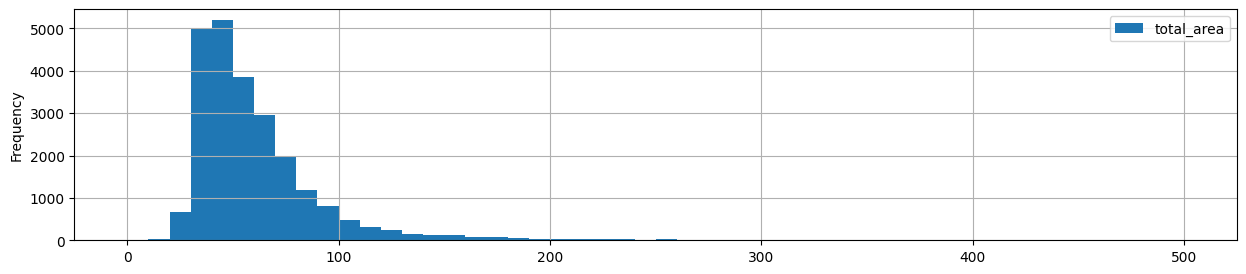

In [49]:
real_estate.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (15,3), range = (0,500))
real_estate['total_area'].describe().round()

На рынке в основном представлены квартиры средней площади от 40 до 70 метров. Выбросы незначительные, не принимаем их во внимание.В целом график нормального распределения, с небольшими перепадами внутри массива - вероятно типы застройки.

count    21683.0
mean        34.0
std         22.0
min          2.0
25%         19.0
50%         30.0
75%         42.0
max        410.0
Name: living_area, dtype: float64

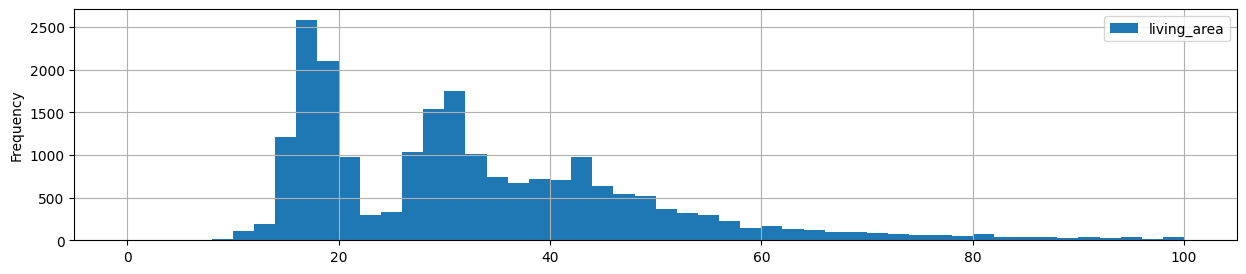

In [50]:
real_estate.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (15,3), range = (0,100))
real_estate['living_area'].describe().round()

Очень большой разброс по жилой площади с провалом в районе 25 метров. Это обусловлено, вероятно, типами квартир.
Количество меньше общего из-за квартир студий, аппартаментов и квартир, у которых не указана жилая площадь.

count    21315.0
mean        11.0
std          6.0
min          1.0
25%          7.0
50%          9.0
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64

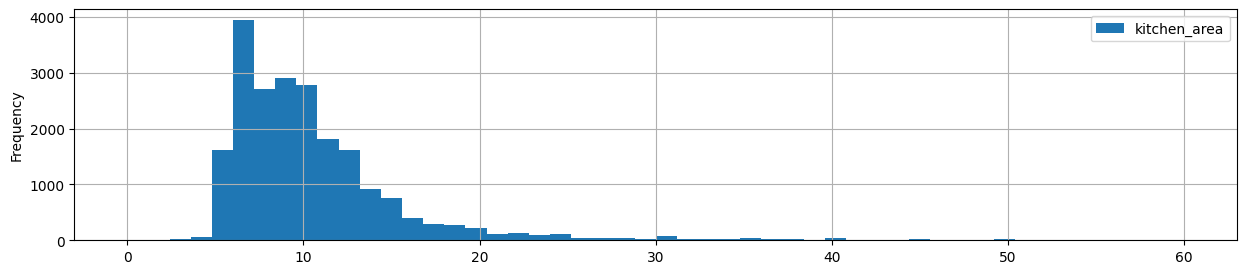

In [51]:
real_estate.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (15,3), range = (0,60))
real_estate['kitchen_area'].describe().round()

Относительно распределения площади кухни больших выбросов нет. 

#### Исследуем прайс - тотал и за м2

count        23572.0
mean       6494828.0
std       10725981.0
min          12190.0
25%        3400000.0
50%        4633500.0
75%        6751265.0
max      763000000.0
Name: last_price, dtype: float64

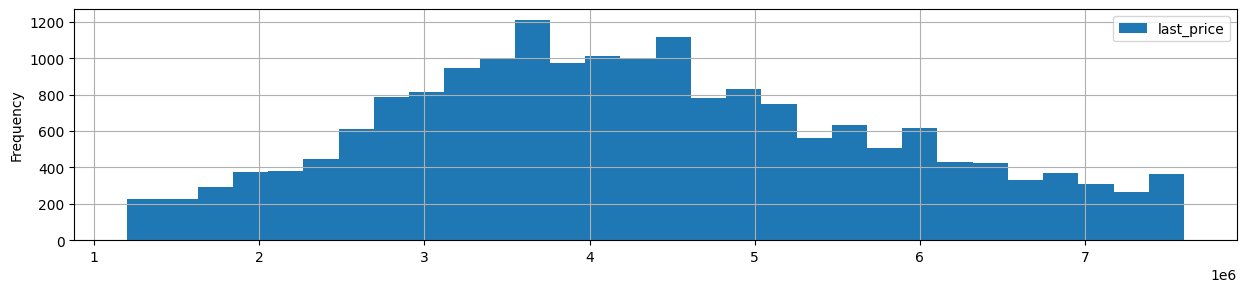

In [52]:
real_estate.plot(y = 'last_price', kind = 'hist', bins = 30, grid=True, figsize = (15,3), range = (1200000,7600000))
real_estate['last_price'].describe().round()

count      23572.0
mean       99286.0
std        49803.0
min          112.0
25%        76619.0
50%        95000.0
75%       114198.0
max      1907500.0
Name: last_price_m2, dtype: float64

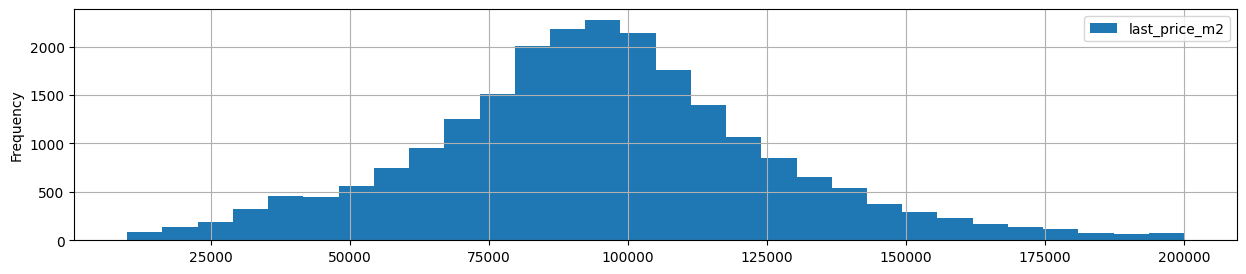

In [53]:
real_estate.plot(y = 'last_price_m2', kind = 'hist', bins = 30, grid=True, figsize = (15,3), range = (10000,200000))
real_estate['last_price_m2'].describe().round()

Цена тотал и цена за метр квадратный соответствует нормальному распределению.

#### Исследуем комнаты и высоту потолков

count    23572.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

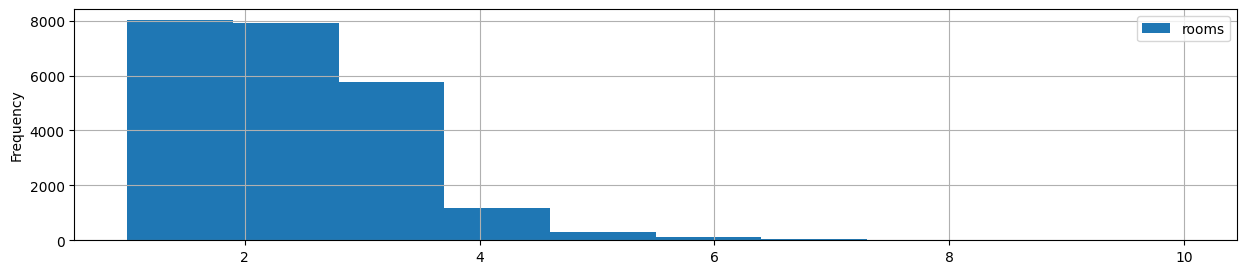

In [54]:
real_estate.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (15,3), range = (1,10))
real_estate['rooms'].describe().round()

На продажу выставлены в основном квартиры с 1, 2 и 3 комнатами - это основной жилой фонд. Многокомнатных квартир незначительное количество.

count    23572.00
mean         2.69
std          0.20
min          2.40
25%          2.60
50%          2.65
75%          2.70
max          4.00
Name: ceiling_height, dtype: float64

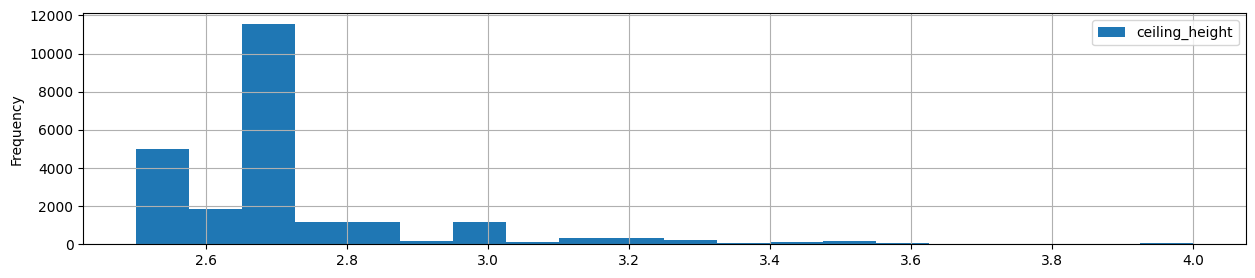

In [55]:
real_estate.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (15,3), range = (2.5,4))
real_estate['ceiling_height'].describe().round(2)

Стандартные высоты потолков в основно, есть высокие ок 3 м - старый жилой фонд, высокие более 4 -  новые квартиры и аппартаменты. Низкие потолки - "хрущевки".

#### Исследуем этажи

count    23572.0
mean         6.0
std          5.0
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

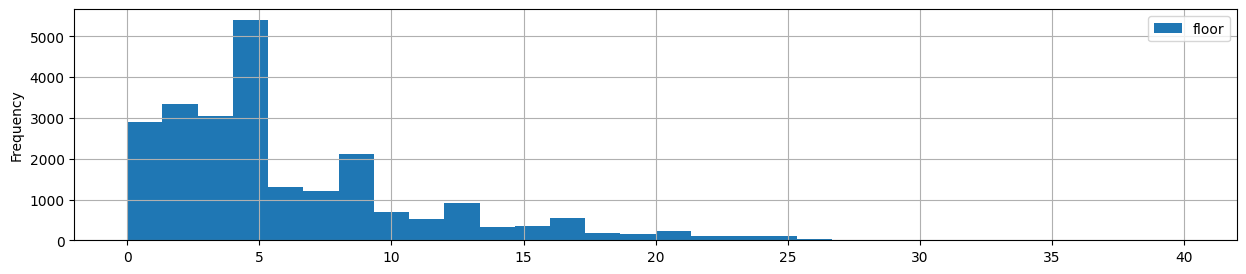

In [56]:
real_estate.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (15,3), range = (0,40))
real_estate['floor'].describe().round()

count    23572.0
mean        11.0
std          7.0
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         36.0
Name: floors_total, dtype: float64

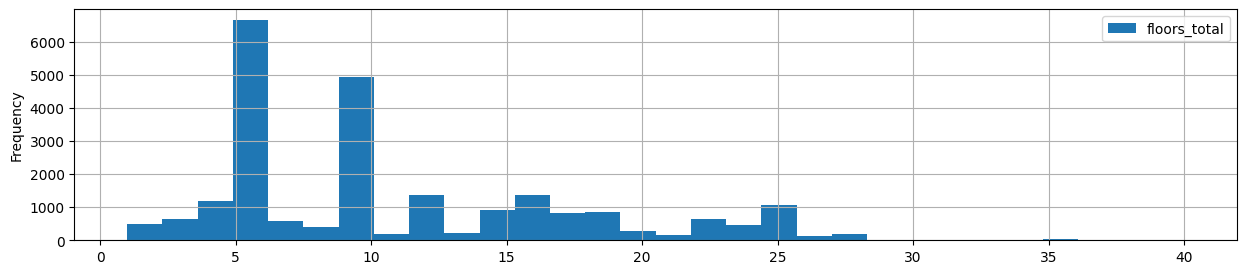

In [57]:
real_estate.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (15,3), range = (1,40))
real_estate['floors_total'].describe().round()

In [58]:
real_estate['floor_status'].value_counts()

другой       17367
последний     3303
первый        2902
Name: floor_status, dtype: int64

In [59]:
floor_status_share = real_estate.pivot_table(index = 'floor_status', values = ['last_price_m2'], 
aggfunc = ['mean', 'count']).astype('int64')
floor_status_share.columns = ['Price_m2, mean','floor_status_count']
floor_status_share['share, %'] = floor_status_share['floor_status_count'] / floor_status_share['floor_status_count'].sum()*100
floor_status_share.sort_values(by='floor_status_count', ascending=False).round()

,"Price_m2, mean",floor_status_count,"share, %"
floor_status,,,
другой,103433,17367,74.0
последний,92611,3303,14.0
первый,82061,2902,12.0


Квартиры в основном продаются в домах до 12 этажей, но есть предложениея и в высотных домах. Первые и последние этажи продаются относительно чаще, чем прочие - более 25% от всех продаж. Интересно будет проверить зависимость скорости продажи данных квартир.

#### Исследуем расстояния до инфраструктурных объектов и парков.

count    23572.0
mean        14.0
std          8.0
min          0.0
25%         10.0
50%         13.0
75%         15.0
max         65.0
Name: cityCenters_nearest, dtype: float64

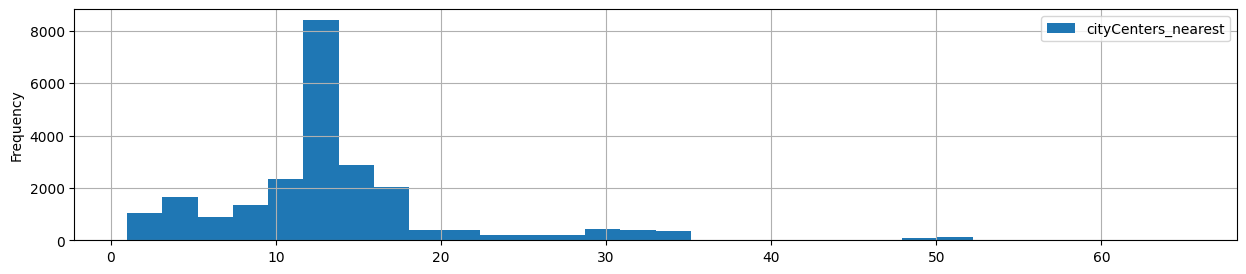

In [60]:
real_estate.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (15,3), range = (1,65))
real_estate['cityCenters_nearest'].describe().round()

count    18061.0
mean        29.0
std         13.0
min          0.0
25%         19.0
50%         27.0
75%         37.0
max         85.0
Name: airports_nearest, dtype: float64

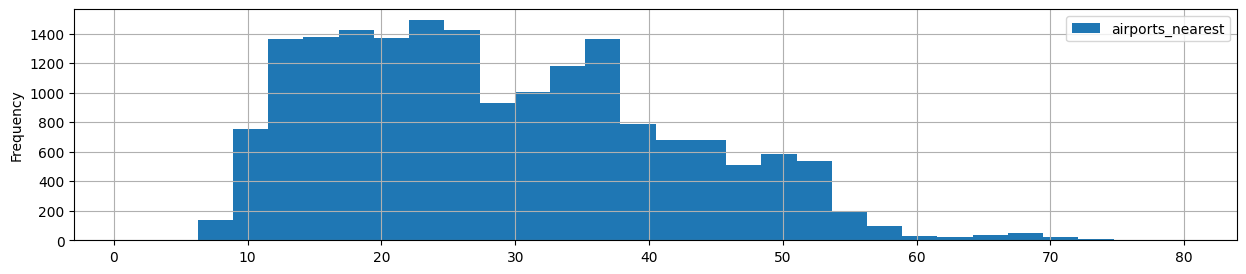

In [61]:
real_estate.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, figsize = (15,3), range = (1,80))
real_estate['airports_nearest'].describe().round()

count    8026.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         1.0
max         3.0
Name: parks_nearest, dtype: float64

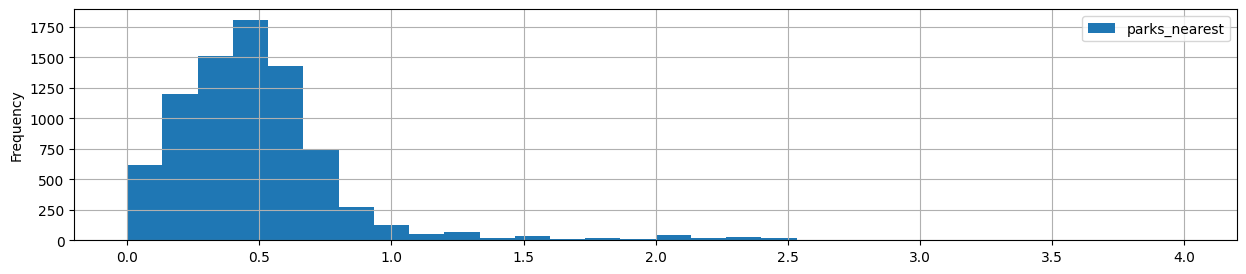

In [62]:
real_estate.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (15,3), range = (0,4))
real_estate['parks_nearest'].describe().round()

Пропущенные расстояния до аэропорта и центра я заполнил медианным значением, а пропуски в расстоянии до парка оставил пропусками. В целом никаких аномалий в графиках нет.

#### Дата публикакции и дни до продажи

count    23572.0
mean         3.0
std          2.0
min          0.0
25%          1.0
50%          3.0
75%          4.0
max          6.0
Name: day_week_exposition, dtype: float64

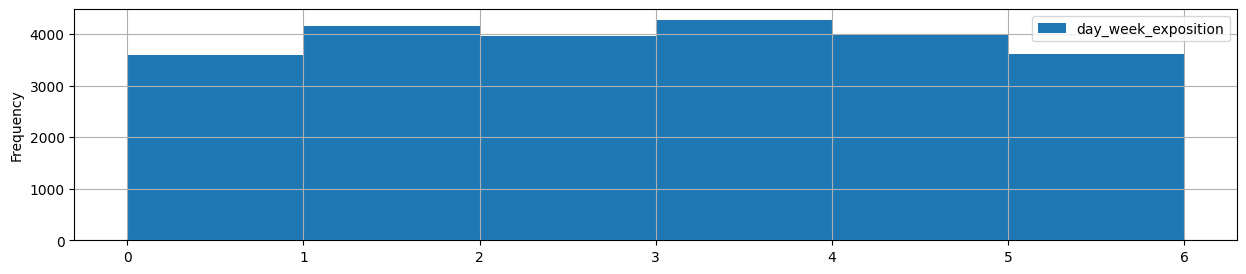

In [63]:
real_estate.plot(y = 'day_week_exposition', kind = 'hist', bins = 6, grid=True, figsize = (15,3), range = (0,6))
real_estate['day_week_exposition'].describe().round()

In [64]:
grouped_by_month_exposition = real_estate.pivot_table(index = 'month_exposition', values = ['last_price_m2'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_month_exposition.columns = ['Price_m2, mean','Count_m2']
grouped_by_month_exposition['share, %'] = grouped_by_month_exposition['Count_m2'] / grouped_by_month_exposition['Count_m2'].sum()*100
grouped_by_month_exposition.sort_values(by='Count_m2', ascending=False).round()

,"Price_m2, mean",Count_m2,"share, %"
month_exposition,,,
February,98825,2632,11.0
March,98868,2573,11.0
April,101818,2371,10.0
November,99129,2358,10.0
October,97787,2118,9.0
September,100463,1972,8.0
June,97702,1749,7.0
August,100139,1737,7.0
July,98523,1680,7.0


- Дни недели на количество публикаций объявлений влияет незначительно - только в воскресенье и понедельник некоторое снижение активности публикаций.
- Месяцы больше влияют:
    - Наиболее активно продвать квартиры начинают в конце зимы - начале весны - 11% в месяц: после новогодних праздников. 
    - И осенью - рост с сентября с 8% по ноябрь - 10%. 
    - Май и январь самые низкие показатели 5% и 6% соответственно
- Самые низкие показатели лето с мая по август и декабрь-январь.

#### Скорость продажи 

count    23572.0
mean       156.0
std        213.0
min          0.0
25%         22.0
50%         73.0
75%        198.0
max       1580.0
Name: days_exposition, dtype: float64

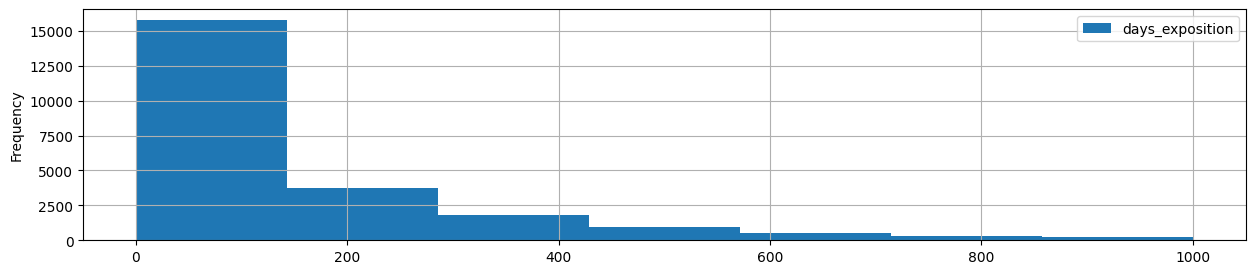

In [65]:
real_estate.plot(y = 'days_exposition', kind = 'hist', bins = 7, grid=True, figsize = (15,3), range = (0,1000))
real_estate['days_exposition'].describe().round()

In [66]:
# Проведем категоризацию сроков продажи
def days(row):
    if row['days_exposition'] == 0:
        return 'Не проданы'
    elif row['days_exposition'] <= 30:
        return 'Месяц 30'
    elif row['days_exposition'] <= 90:
        return 'Квартал 90'
    elif row['days_exposition'] <= 180:
        return 'Полгода 180'
    elif row['days_exposition'] <= 365:
        return 'Год 365'
    elif row['days_exposition'] <= 730:
        return 'Два года 730'
    elif row['days_exposition'] <= 1095:
        return 'Три года 1095'
    else:
        return 'ДОЛГО'
real_estate['days_exposition_type'] = real_estate.apply(days, axis=1)

In [67]:
grouped_by_days_exposition = real_estate.pivot_table(index = 'days_exposition_type', values = ['last_price','last_price_m2'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_days_exposition.columns = ['Last_price_mean','Price_m2_mean','Last_price_count','count_m2']
grouped_by_days_exposition['share, %'] = grouped_by_days_exposition['Last_price_count'] / grouped_by_days_exposition['Last_price_count'].sum()*100
grouped_by_days_exposition.sort_values(by='Last_price_count', ascending=False).round()

,Last_price_mean,Price_m2_mean,Last_price_count,count_m2,"share, %"
days_exposition_type,,,,,
Квартал 90,5614444,95485,6170,6170,26.0
Полгода 180,6176335,96975,4108,4108,17.0
Месяц 30,5493597,99573,3722,3722,16.0
Год 365,6733744,97688,3385,3385,14.0
Не проданы,8259575,108297,3168,3168,13.0
Два года 730,7582163,100833,2275,2275,10.0
Три года 1095,8468535,105208,578,578,2.0
ДОЛГО,9223560,110058,166,166,1.0


In [68]:
display(real_estate.days_exposition.mean())
display(real_estate.days_exposition.median())

156.26841167486847

73.0

<AxesSubplot: xlabel='days_exposition'>

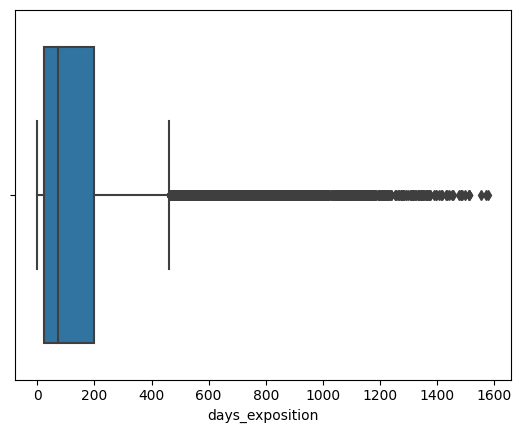

In [69]:
sns.boxplot(x=real_estate['days_exposition'])

- Продажа основного колличества квартир укладывается в интервал "1  месяц - 180 дней" - почти 14 000 - 60%. 
- Быстрые продажи до месяца занимают 16% продаж - 3713 квартир.
- Долгие продажи более года - составляют более 13% всех.
- Есть небольшая зависимость скорости продажи отцены м2 - недвижимость с ценой выше 100 тысяч продается дольше всего
- Медиана 73 дня - средняя скорость продажи.
- Средняя в 2 раза больше медианы, т.к. более 25% квартир продаются год и более.
- Распределение по скорости продажи:
    - до 30 - сверхбыстрая
    -  до 90 дней - быстрая
    - до года - средняя
    -  остальные - долгие продажи. 
- Причины долгой продажи - высокая цена, большой размер, удаленность. 

В анализе связей между показателями определим зависимости.

#### Разберем, как влияют различные факторы на цену 

In [70]:
real_estate_temp=real_estate[['last_price','total_area', 'kitchen_area', 'living_area','rooms', 'floor_status','day_week_exposition',
                              'month_exposition',  'year_exposition']]

array([[<AxesSubplot: xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot: xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot: xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot: xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot: xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot: xlabel='day_week_exposition', ylabel='last_price'>,
        <AxesSubplot: xlabel='year_exposition', ylabel='last_price'>],
       [<AxesSubplot: xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot: xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot: xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot: xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot: xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot: xlabel='day_week_exposition', ylabel='total_area'>,
        <AxesSubplot: xlabel='year_exposition', ylabel='total_area'>],
       [<AxesSubplot: xlabel='last_price', ylabel='kitchen_area'

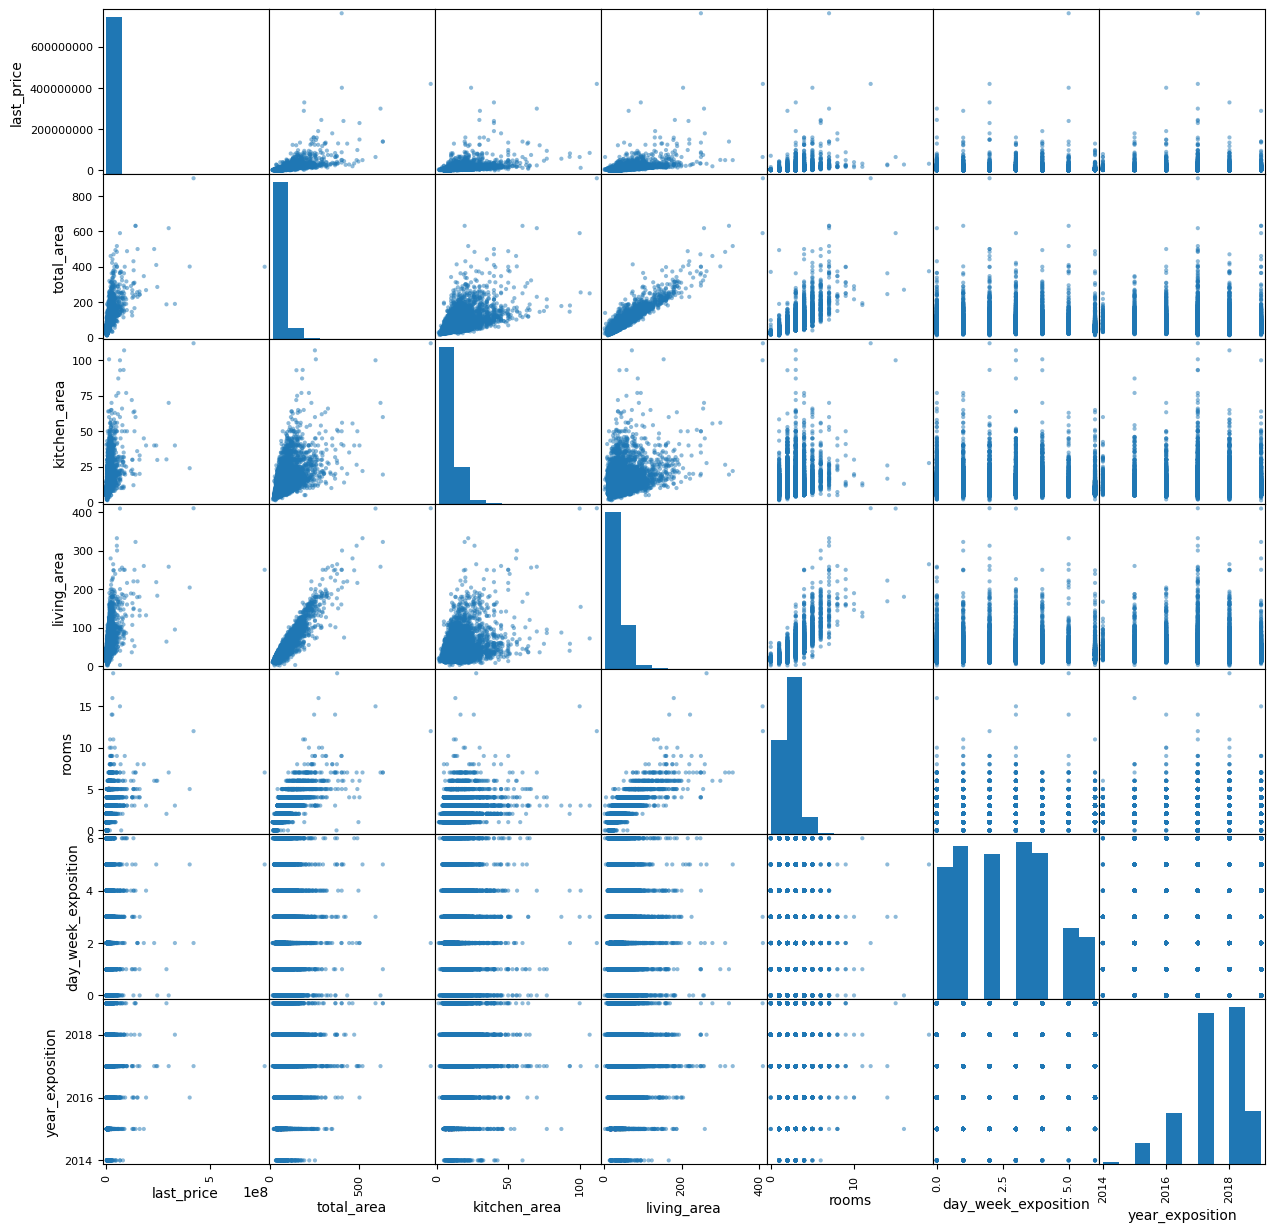

In [71]:
pd.plotting.scatter_matrix(real_estate_temp, figsize=(15, 15)) # выведем матрицу диаграмм

- В матрице диаграмм видна зависимость цены от всех видов площади: общаяя, жилая, кухни.
- Есть зависимость от количества комнат (скть та же, что у общей площади).
- И неочевидная зависмость от дня и года.

Проверим гипотезы по каждому параметру

#### Проверим влияние на цену второстепенных факторов: день, месяц, год публикации, колличество комнат и тип этажа, количество балконов

(0.0, 20000000.0)

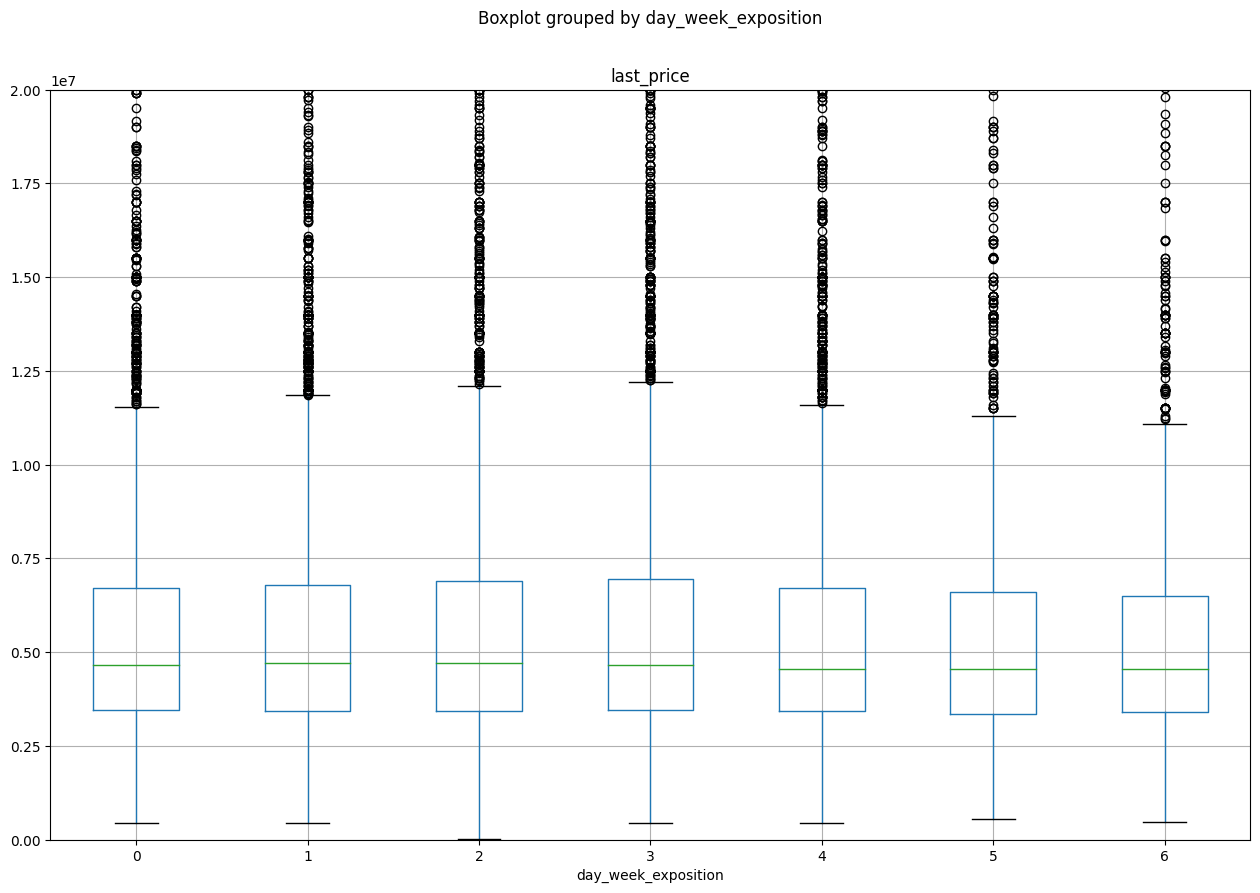

In [72]:
real_estate.boxplot('last_price', by='day_week_exposition',figsize=(15,10)).set_ylim(0,20000000)
# влияние дня недели публикации на цену

день недели публикации объявления на цену не влияет. Если учесть количество выложенных объявлений по дням недели, то график повторяет его - ниже в понедельник и воскресение

(0.0, 20000000.0)

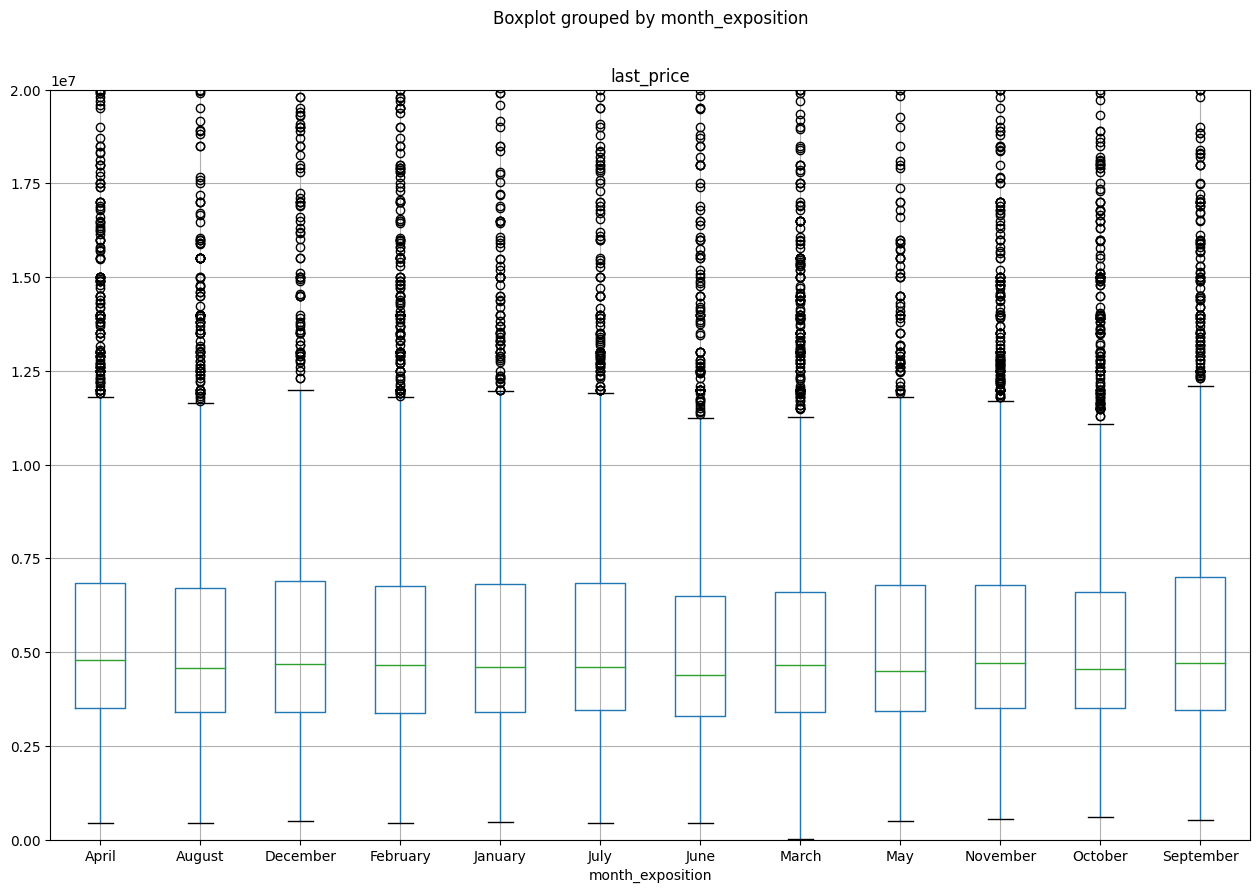

In [73]:
real_estate.boxplot('last_price', by='month_exposition',figsize=(15,10)).set_ylim(0,20000000)
# влияние месяца публикации на цену

Явной корелляции между ценой и месяцем публикации тоже не наблюдается. 
И при снижении активности публикаций в Июне и при пике в октябре, показатели схожи.
Можно сделать вывод, что нет счастливого дня недели или чудо месяца по продажам квартир, как декабрь в ритейле.

(0.0, 33000000.0)

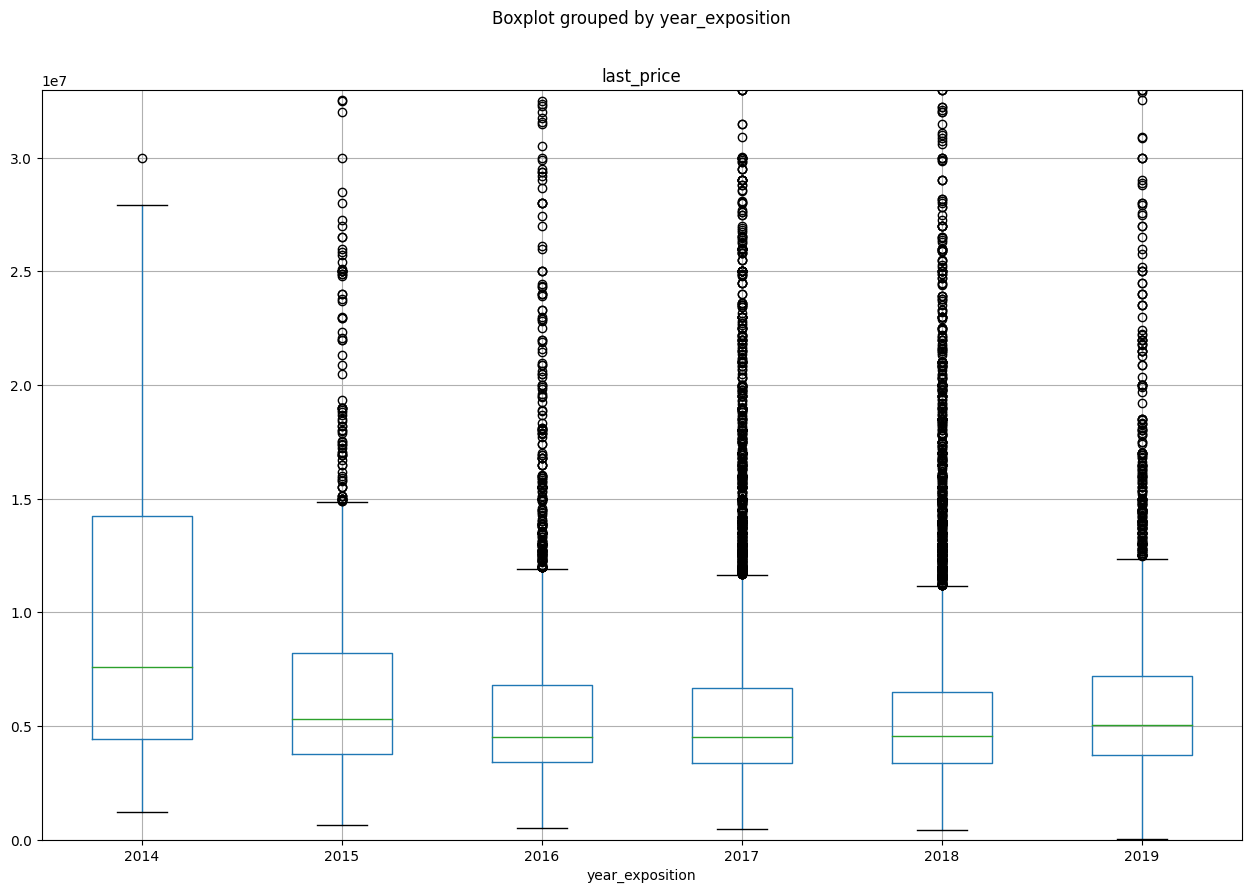

In [74]:
real_estate.boxplot('last_price', by='year_exposition',figsize=(15,10)).set_ylim(0,33000000)
# влияние года публикации на цену

In [75]:
real_estate.year_exposition.value_counts() # проверим выборку по 2014 и 2015 годам по сравнению с другими

2018    8478
2017    8159
2019    2876
2016    2757
2015    1167
2014     135
Name: year_exposition, dtype: int64

Кажется, что в 2014 году стоимость квартир была более равномерна и стоили они в среднем дороже, но это обусловлено малой выборкой.
При равномерном распределении выборки данных - влияние года на стоимость не принципиально.

(0.0, 20000000.0)

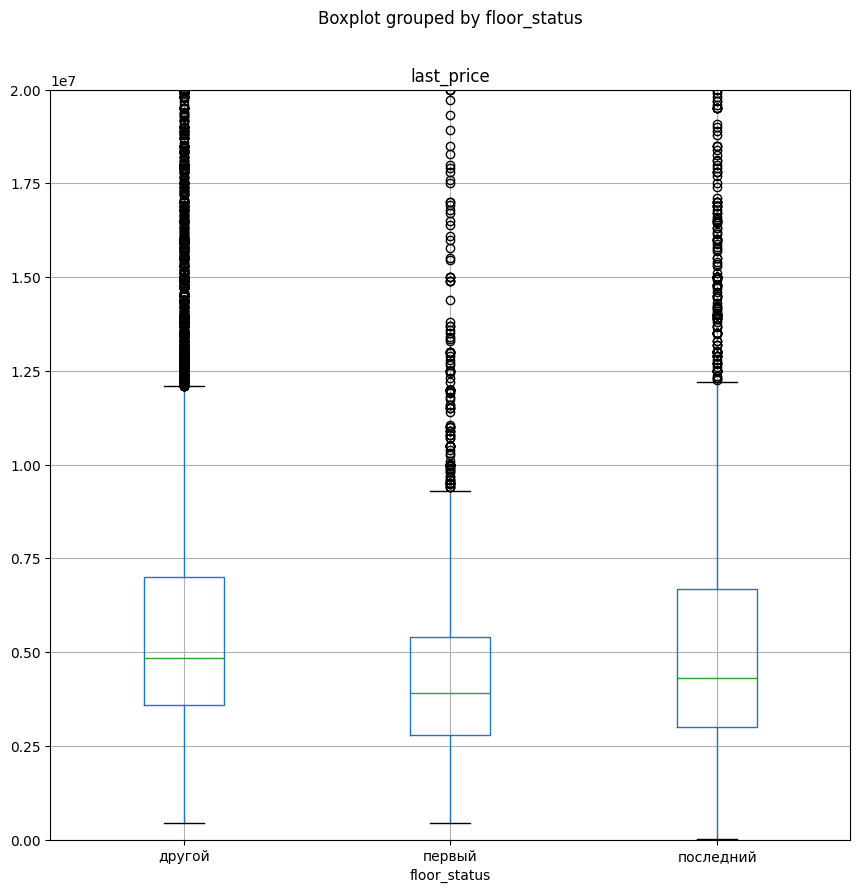

In [76]:
real_estate.boxplot('last_price', by='floor_status',figsize=(10,10)).set_ylim(0,20000000)
# влияние типа этажа на цену

Зависимость стоимости от этажа выражена значительно сильнее.
Первые этажи продаются дешевле последних, а последние дешевле других этажей.

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Основнаой вопрос - безопасность для 1 этажа. Для последнего - качество кровли.
</div>

(0.0, 20000000.0)

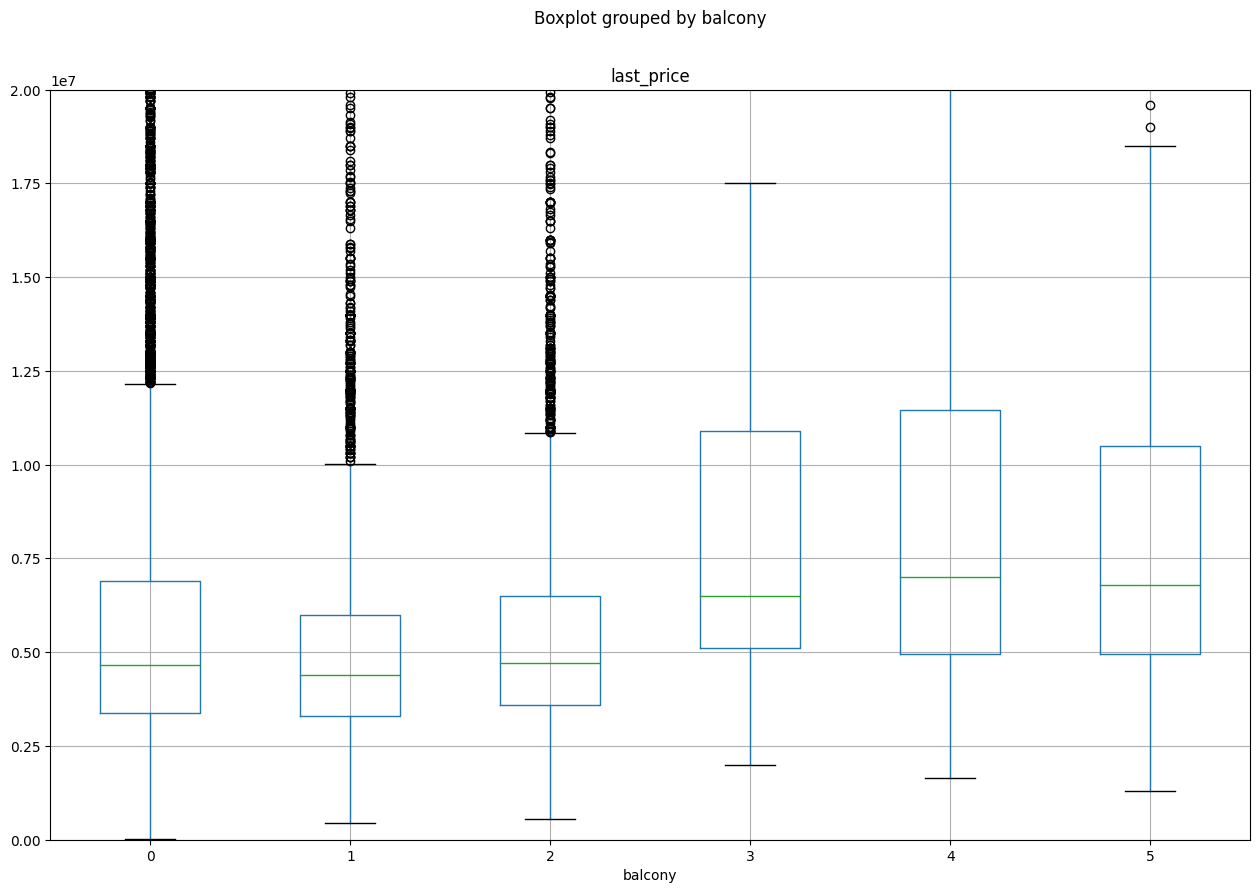

In [77]:
real_estate.boxplot('last_price', by='balcony',figsize=(15,10)).set_ylim(0,20000000)

Зависимость цены  от количества балконов разделено на 3 блока:
- 0 балконов - старый фонд в центре
- 1 и 2 - незначительное влияние на стоимость
- 3 и более балконов - значительный рост в цене. т.к. большее количество балконов - больше квартира.

#### Проверим влияние разных типов площадей на цену

<AxesSubplot: xlabel='total_area', ylabel='last_price'>

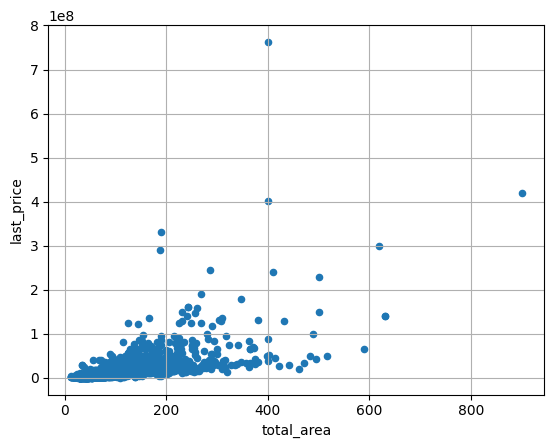

In [78]:
real_estate.plot(x='total_area', y='last_price', kind='scatter',  grid=True)

Text(0, 0.5, 'Kitchen Area')

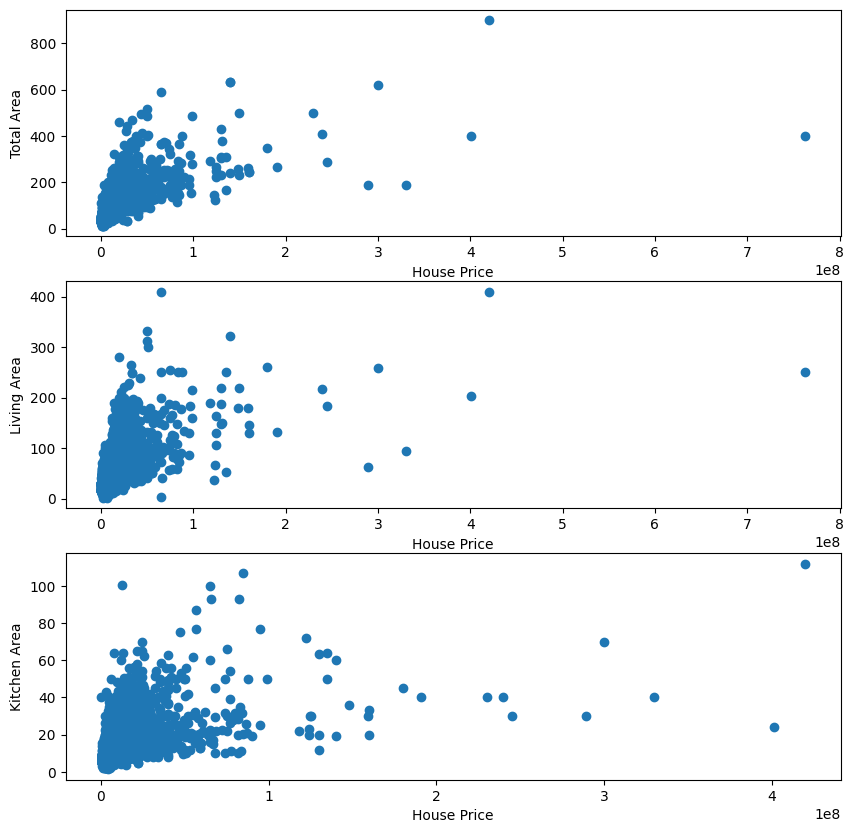

In [79]:
fig, ax = plt.subplots(3, figsize=(10, 10))
ax[0].scatter(x = real_estate['last_price'], y = real_estate['total_area'])
ax[0].set_xlabel("House Price")
ax[0].set_ylabel("Total Area")

ax[1].scatter(x = real_estate['last_price'], y = real_estate['living_area'])
ax[1].set_xlabel("House Price")
ax[1].set_ylabel("Living Area")

ax[2].scatter(x = real_estate['last_price'], y = real_estate['kitchen_area'])
ax[2].set_xlabel("House Price")
ax[2].set_ylabel("Kitchen Area")

- Наибольшее влияние на цену и более прямая зависисмость от общей площади.
- Зависимость от жилой площади более размытая.
- зависимость цены от площади кухни очевидна, но менее прямая.

#### Изучим среднюю цену по локациям

In [80]:
top_10_locality = real_estate.groupby('locality_name')\
    .agg({'locality_name':'count','last_price_m2':'mean'})
top_10_locality.rename(columns={'locality_name':'locality_count'}).sort_values('locality_count', ascending=False).head(10).round()

,locality_count,last_price_m2
locality_name,,
Санкт-Петербург,15667,114620.0
Мурино,556,85682.0
Кудрово,471,95326.0
Шушары,440,78677.0
Всеволожск,396,68670.0
Пушкин,368,103058.0
Колпино,338,75425.0
Парголово,327,90176.0
Гатчина,307,68746.0


Ожидаемо - Санкт-Петербург имеет самое большое колличество объявлений и самую высокую среднюю цену среди Топ-10 по колличеству объявлений. При этом разрыв более чем в 3 раза по количеству.

In [81]:
real_estate.groupby('locality_name').agg({'last_price_m2':'mean'}).sort_values(by='last_price_m2', ascending=False).head(10).round()

,last_price_m2
locality_name,
Зеленогорск,115123.0
Санкт-Петербург,114620.0
Репино,104238.0
Пушкин,103058.0
Сестрорецк,101758.0
Лисий Нос,100661.0
Мистолово,98550.0
Левашово,96998.0
Кудрово,95326.0


Но в СПб не самая высокая средняя цена, в Зеленогорске средняя цена еще выше. Кроме СПб высокие цены в пригородах и поселках у залива и крупных городах области.

In [82]:
real_estate.groupby('locality_name').agg({'last_price_m2':'mean'}).sort_values(by='last_price_m2', ascending=False).tail(10).round()

,last_price_m2
locality_name,
Житково,14956.0
Ям-Тесово,13712.0
Сижно,13710.0
Тесово-4,12931.0
Малая Романовка,12725.0
Совхозный,12630.0
Выскатка,12336.0
Вахнова Кара,11688.0
Свирь,11482.0


Самая низкая цена за метр жилья в удаленных поселках.

#### Зависимость цены м2 от удаленности от центра в СПб

,last_price_m2
cityCenters_nearest,
0,188193.0
1,164810.0
2,145186.0
3,129538.0
4,136805.0
5,146229.0
6,151858.0
7,141405.0
8,119865.0


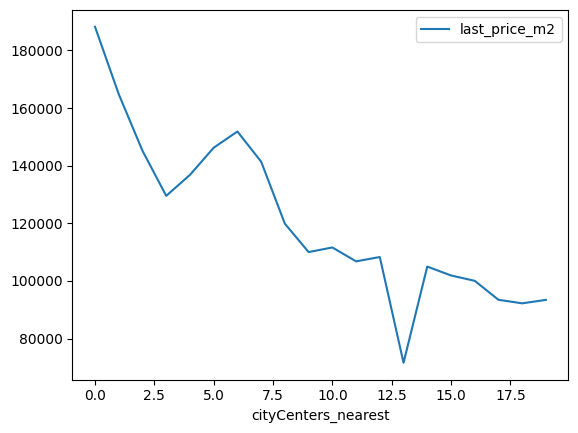

In [83]:
cityCenters_SPb = real_estate.query('locality_name == "Санкт-Петербург"' and 'cityCenters_nearest <20')\
                    .pivot_table(index = 'cityCenters_nearest', \
                    values = 'last_price_m2', aggfunc = 'mean') # срез по локации с удаленим от центра 20 КМ.
cityCenters_SPb.plot()
cityCenters_SPb.round()

- Стоимомть за метр квадратный резко падает после 7 км от центра.
- в районе 5-7 км есть всплеск - это квартиры на Крестовском и в Приморском районе
- После 8 км снижение цены плавное, далее удаленность от центра не так влияет на цену.
- Есть провал в районе удаленности 13 км от центра - это жилье у КАД. 

Таким образом считать центром можно радиус 7 КМ


In [84]:
real_estate.describe().round()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_week_exposition,year_exposition,last_price_m2
count,23572.0,23572.0,23572.0,23572.0,23572.0,23572.0,21683.0,23572.0,21315.0,23572.0,18061.0,23572.0,18082.0,8026.0,18082.0,9047.0,23572.0,23572.0,23572.0,23572.0
mean,10.0,6494828.0,60.0,2.0,3.0,11.0,34.0,6.0,11.0,1.0,29.0,14.0,1.0,0.0,1.0,1.0,156.0,3.0,2017.0,99286.0
std,6.0,10725981.0,35.0,1.0,0.0,7.0,22.0,5.0,6.0,1.0,13.0,8.0,1.0,0.0,1.0,0.0,213.0,2.0,1.0,49803.0
min,0.0,12190.0,12.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,112.0
25%,6.0,3400000.0,40.0,1.0,3.0,5.0,19.0,2.0,7.0,0.0,19.0,10.0,0.0,0.0,0.0,0.0,22.0,1.0,2017.0,76619.0
50%,9.0,4633500.0,52.0,2.0,3.0,9.0,30.0,4.0,9.0,0.0,27.0,13.0,0.0,0.0,1.0,1.0,73.0,3.0,2017.0,95000.0
75%,14.0,6751265.0,70.0,3.0,3.0,16.0,42.0,8.0,12.0,1.0,37.0,15.0,1.0,1.0,1.0,1.0,198.0,4.0,2018.0,114198.0
max,50.0,763000000.0,900.0,19.0,4.0,36.0,410.0,33.0,112.0,5.0,85.0,65.0,3.0,3.0,3.0,1.0,1580.0,6.0,2019.0,1907500.0


### Общий вывод  "Исследование продаж недвижимости в СПб и Ленобласти"

#### Цель:  Определить, какие факторы влияют на стоимость жилья.

#### Основные данные использованные в исследовании:

- стоимость жилья полная и м2
- площадь общая, жилая, кухни
- расстояние от центра города (для СПБ)
- этаж и тип этажа
- дополнительные данные - колличество комнат, балконы, высота потолков
- слокация расположения недвижимости
- идентификатор семейного положения
- дата публикации и производные от нее - день недели, месяц, год
- количество дней до снятия объявления

#### Задача исследования - исследовать гипотезы:

- Есть ли зависимость цены от основных параметров

#### Выводы:
##### Массив данных по недвижимости:
 - Основной маасив недвижимости по площади - от 40 до 70 м2
 - Цена за метр в основном массиве от 76 до 95 тысяч, но есть и выбросы по цене. Средняя стоимость 99 тысяч.
 - Больше всего выставлено 1 и 2 комнатных квартир 
 - Больше всего объявлений в Санкт-Петербурге.
 
##### Прямое влияние на цену имеют следующие факторы:

- общая площадь недвижимости - прямое влияние на общую цену
- расположение - локация и центр - на цену м2:
    - самая высокая цена м2 в Зеленогорске и СПб
    - самая низкая в удаленных поселках и городках Ленлобласти.
    - ближе к центру СПБ стоимость м2 выше
- тип этажа на цену м2
    - первый этах продается дешевле всех - ниже на 20% от других, 
    - последний дороже первого и дешевле всех остальных на 10%
- количество балконов и комнат напрямую зависит от площади квартиры, соответственно влияние есть аналогично влиянию площади

##### не влияют на цену следующие факторы:

- Дата, день недели, месяц публикации - нет счастливого дня или месяца
- год публикации незначительно влияет, но это связано с коньюктурой рынка и экономической ситуацией, 2014 год - низкая выборка

##### Скорость продажи и активность публикации

- наиболее активно продажу недвижимости начинают с февраля по апрель и с сентября  по ноябрь.
- лето и новогодние праздники - самое низкое количество опубликованных объявлений
- основная часть недвижимости продается в периоде до полугода:
    - за месяц 16%
    - за полгода 60%
    - за год 74%
- остальные:
    - 12% это квартиры продающиеся долго 
    - 13% не проданые на момент подготовки среза для анализа

#### Рекомендации:

- уделить внимание правилам заполнения параметров объявления:
    - сделать обязательные поля, влияющие на стоимость, чтобы не сталкиваться с проблемой отсутствующих значений.
    - данные до центра, парков, водоемов, аэропортов подтягиваться автоматически
- считать расстояние в километрах и целых числах - ввести маску ввода данных в критичных полях
- данные по уровню дохода и количеству детей требуют дополнительно исследования с большей выборкой.